In [1]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat
import array_to_latex as atl

In [2]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

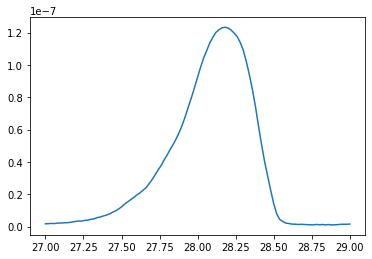

In [3]:
with open('Data/Hauptpeak Stickstoff.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]
plt.plot(data[0],data[1])


err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.05
data = np.vstack([data,err])

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 3
    chi-square         = 2655.84049
    reduced chi-square = 56.5072445
    Akaike info crit   = 204.624672
    Bayesian info crit = 210.360741
[[Variables]]
    amplitude:  5.7247e-08 +/- 3.6990e-09 (6.46%) (init = 8.722935e-08)
    center:     28.0592718 +/- 0.01015796 (0.04%) (init = 28.14)
    sigma:      0.19653992 +/- 0.00621057 (3.16%) (init = 0.24)
    fwhm:       0.46281613 +/- 0.01462478 (3.16%) == '2.3548200*sigma'
    height:     1.1620e-07 +/- 9.7765e-09 (8.41%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.630
    C(amplitude, sigma)  = -0.466
    C(amplitude, center) = 0.259


array([[2.76000000e+01, 2.76100000e+01, 2.76200000e+01, 2.76300000e+01,
        2.76400000e+01, 2.76500000e+01, 2.76600000e+01, 2.76700000e+01,
        2.76800000e+01, 2.76900000e+01, 2.77000000e+01, 2.77100000e+01,
        2.77200000e+01, 2.77300000e+01, 2.77400000e+01, 2.77500000e+01,
        2.77600000e+01, 2.77700000e+01, 2.77800000e+01, 2.77900000e+01,
        2.78000000e+01, 2.78100000e+01, 2.78200000e+01, 2.78300000e+01,
        2.78400000e+01, 2.78500000e+01, 2.78600000e+01, 2.78700000e+01,
        2.78800000e+01, 2.78900000e+01, 2.79000000e+01, 2.79100000e+01,
        2.79200000e+01, 2.79300000e+01, 2.79400000e+01, 2.79500000e+01,
        2.79600000e+01, 2.79700000e+01, 2.79800000e+01, 2.79900000e+01,
        2.80000000e+01, 2.80100000e+01, 2.80200000e+01, 2.80300000e+01,
        2.80400000e+01, 2.80500000e+01, 2.80600000e+01, 2.80700000e+01,
        2.80800000e+01, 2.80900000e+01, 2.81000000e+01, 2.81100000e+01,
        2.81200000e+01, 2.81300000e+01, 2.81400000e+01, 2.815000

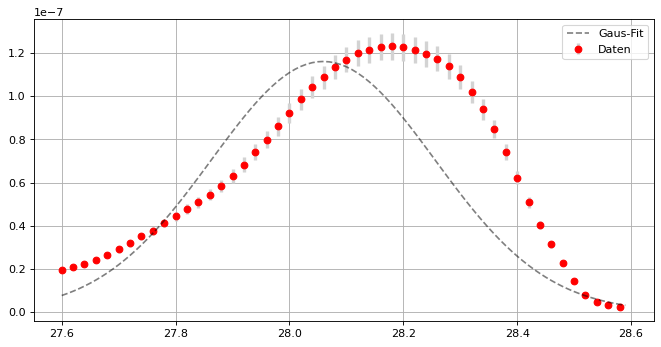

In [7]:
von =27.6
bis =28.6
vonarr = pos(von)
bisarr = pos(bis)

model_gaus = lmfit.models.GaussianModel()  
pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])

#Fitten
out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')

fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")

plt.grid()
plt.legend()
#plt.savefig('Results/'+str(path)+'.pdf')
print(out_gaus.fit_report())
np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])

In [10]:
five = ufloat(out_gaus.params['height'].value,out_gaus.params['height'].stderr)*0.05
five = out_gaus.params['height'].value*0.05

bound=[]
for i in np.arange(27,29,0.0001):
    if out_gaus.eval(x=i) >= five:
        bound.append(i)
dm = ufloat(bound[-1],0.05)-ufloat(bound[0],0.05)
print(dm)

0.96+/-0.07
